In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#### load data.

In [2]:
data = pd.read_csv('..\data\processed\dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8536\3158277823.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('..\data\processed\dataset.csv')


#### feature selection.

In [3]:
feature = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = ['value_eur']

#### training with linear regression.

Mean Squared Error: 11546109159822.004
0.8290718097402774


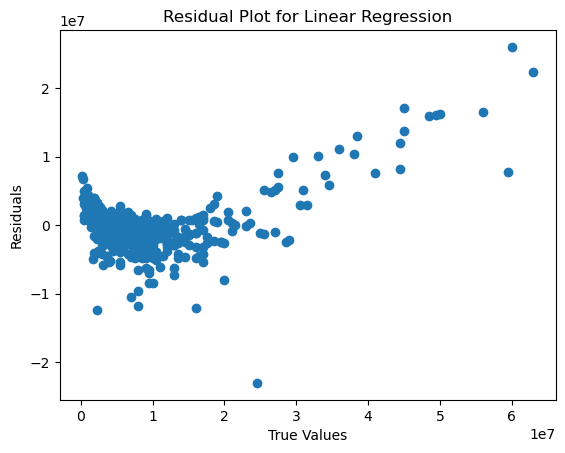

In [4]:
#  train test regression.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[feature]
y = data[target]

# Chia train-test-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_y_pred)
print(f"Mean Squared Error: {mse}")

print(lr_model.score(X_test, y_test))

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

#### optimization for linear regression.

Linear Regression - Mean Squared Error: 11699441554136.818
Linear Regression - R2 Score: 0.8268018824162208


c:\Users\Admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Mean Squared Error: 936629600968.0707
Random Forest - R2 Score: 0.98613416862589


c:\Users\Admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ensemble Model - Mean Squared Error: 4018881385863.022
Ensemble Model - R2 Score: 0.9405046225836443


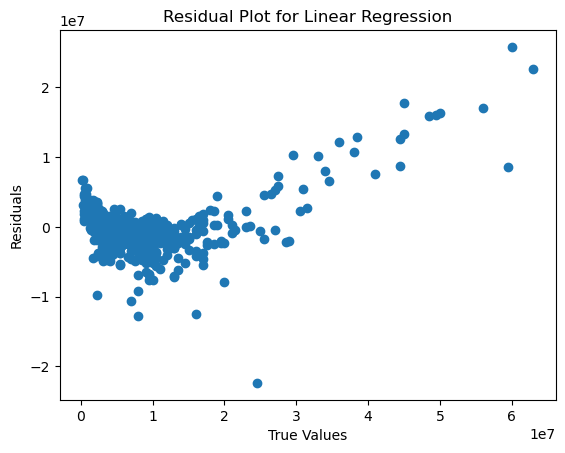

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

X = data[feature]
y = data[target]

# Chia train-test-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Chọn đặc trưng với RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_val_rfe = rfe.transform(X_val_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train_rfe, y_train)
lr_y_pred = lr_model.predict(X_test_rfe)

# Đánh giá mô hình Linear Regression
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")

# Huấn luyện mô hình Ensemble (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[
    ('lr', lr_model),
    ('rf', rf_model)
])
ensemble_model.fit(X_train_scaled, y_train)
ensemble_y_pred = ensemble_model.predict(X_test_scaled)

# Đánh giá mô hình Ensemble
mse_ensemble = mean_squared_error(y_test, ensemble_y_pred)
r2_ensemble = r2_score(y_test, ensemble_y_pred)
print(f"Ensemble Model - Mean Squared Error: {mse_ensemble}")
print(f"Ensemble Model - R2 Score: {r2_ensemble}")

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()



Linear Regression - Mean Squared Error: 63966301811901.5
Linear Regression - R2 Score: 0.053045137979269685
Ridge Regression - Mean Squared Error: 63944655017678.75
Ridge Regression - R2 Score: 0.053365596352753175
Lasso Regression - Mean Squared Error: 63891661779806.0
Lasso Regression - R2 Score: 0.054150106365625006


c:\Users\Admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+17, tolerance: 2.598e+13
  model = cd_fast.enet_coordinate_descent(


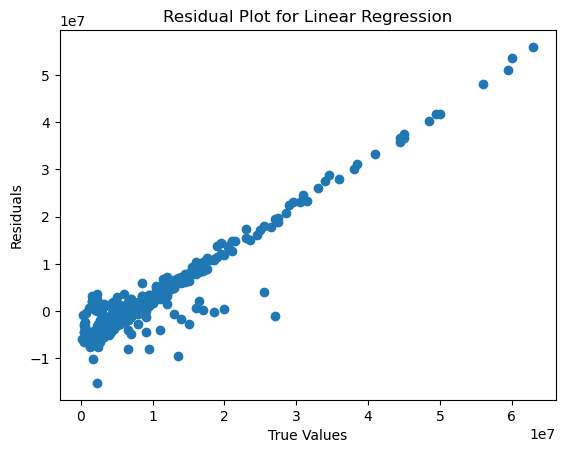

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

feature = [
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']
target = ['value_eur']

X = data[feature]
y = data[target]

# Chia train-test-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thêm các đặc trưng đa thức
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Chọn đặc trưng với RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_poly, y_train)
X_val_rfe = rfe.transform(X_val_poly)
X_test_rfe = rfe.transform(X_test_poly)

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train_rfe, y_train)
lr_y_pred = lr_model.predict(X_test_rfe)

# Đánh giá mô hình Linear Regression
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

# Huấn luyện mô hình Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_rfe, y_train)
ridge_y_pred = ridge_model.predict(X_test_rfe)

# Đánh giá mô hình Ridge Regression
mse_ridge = mean_squared_error(y_test, ridge_y_pred)
r2_ridge = r2_score(y_test, ridge_y_pred)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R2 Score: {r2_ridge}")

# Huấn luyện mô hình Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_rfe, y_train)
lasso_y_pred = lasso_model.predict(X_test_rfe)

# Đánh giá mô hình Lasso Regression
mse_lasso = mean_squared_error(y_test, lasso_y_pred)
r2_lasso = r2_score(y_test, lasso_y_pred)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R2 Score: {r2_lasso}")

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()
